# Decision Trees

Slides: [link](https://docs.google.com/presentation/d/1kXs3Mi9a3w87J6tzs2sWyxW8kq2eaRQTBgUPKvuf8x8/edit?usp=sharing)

- Decision trees can be applied to both regression and classification problems.

### Pros and Cons
- Tree-based methods are simple and useful for interpretation.

- Able to handle both numerical and categorical data

- Requires little data preparation

- Not Robust

- Prone to overfitting

- Performs well with large datasets.

- However they typically are not competitive with the best supervised learning approaches in terms of prediction accuracy.


- Hence we also discuss random forests, and boosting. These methods grow multiple trees which are then combined to yield a single consensus prediction.


- Combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss interpretation.

### Decision Tree Classification

In [25]:
%matplotlib inline 
!pip install graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.model_selection import cross_val_score

In [5]:
# Uncomment for later visualization
!pip install pydotplus

    100% |████████████████████████████████| 286kB 6.1MB/s ta 0:00:01
  Stored in directory: /Users/Gary/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [7]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')

In [8]:
target=bc['class']
target = bc['class'].map(lambda x: 1 if x == 4 else 0).values 
target = pd.Series(target)

In [9]:
predictor=bc.drop(columns=['class'])
predictor.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [10]:
target.value_counts(normalize=True)

0    0.634446
1    0.365554
dtype: float64

In [11]:
# Import train_test_split function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=9) 

In [12]:
# Import our classifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Initial paramters used in model
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2, class_weight='balanced')

In [14]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

In [15]:
importances = clf_tree.feature_importances_

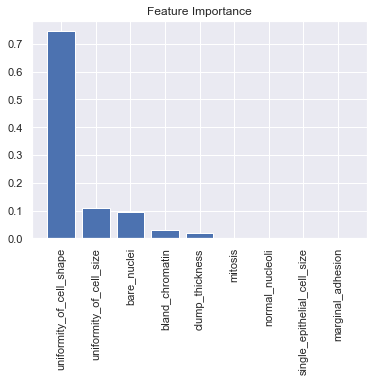

In [16]:
# creating list of column names
feat_names=list(X_train)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [27]:
import pydotplus 
from sklearn.tree import export_graphviz

# def tree_graph_to_png(clf_tree, feature_names, png_file_to_save):
#     tree_str = export_graphviz(tree, feature_names=feature_names, 
#                                      filled=True, out_file=None)
#     graph = pydotplus.graph_from_dot_data(tree_str)  
#     graph.write_png(png_file_to_save)

In [28]:
target = y_train.map(lambda x: 'malignant' if x == 1 else 'benign').values 
target = pd.Series(target)

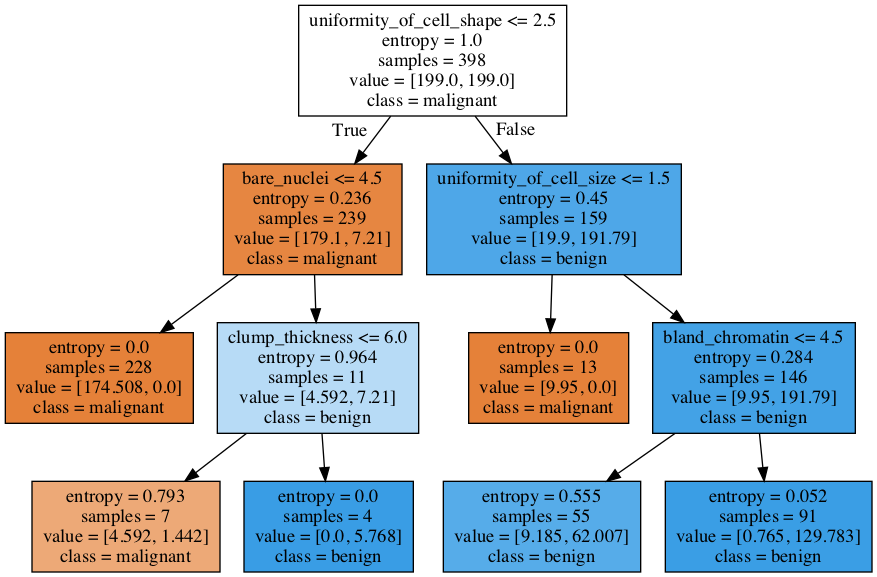

In [36]:
# Create DOT data
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                                feature_names=feat_names, class_names=['malignant','benign'],
                               filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

- At the beginning, the number of samples from two classes is equal, so the root node of the tree is white.
- The more samples of the first class, the darker the orange color of the vertex.
- The more samples of the second class, the darker the blue.

In [ ]:
#Predict the response for test dataset
y_pred = clf_tree.predict(X_test)

In [ ]:
yprob = clf_tree.predict_proba(X_test)
yprob
yprob[:5]

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

### Main Parameters
- max_depth – the maximum depth of the tree.


- max_features - the maximum number of features with which to search for the best partition (this is necessary with a large number of features because it would be "expensive" to search for partitions for all features);


- min_samples_leaf – the minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members.

### Decision Tree Regression

In [ ]:
df=pd.read_csv('hitters.csv')

In [ ]:
df.head()

In [ ]:
df=df.dropna()

In [ ]:
X=df[['Hits','Years']]
y=df['Salary']

In [ ]:
# Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

In [ ]:
# creating list of column names
feat_names=list(X_train)

# Create DOT data
dot_data = tree.export_graphviz(tree_reg, out_file=None, 
                                feature_names=feat_names, class_names=['Salary'],
                               filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

- Darker images indicate higher predicted target values.

In [ ]:
from sklearn import metrics
y_pred = tree_reg.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Regularization Hyperparameters

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html